In [1]:
import os
import xarray as xr
import numpy as np

In [2]:
dirpath = './data'

ds = xr.open_dataset(os.path.join(dirpath, 'uv_700_850_1979-2021.nc'))
print(ds)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 2, time: 515)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 700 850
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-11-01
Data variables:
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-27 06:21:30 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...


In [3]:
u700 = ds['u'].sel(level=700)
u700

<xarray.DataArray 'u' (time: 515, latitude: 721, longitude: 1440)>
[534693600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 700
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-11-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [9]:
# annualization
months = [11, 12, 1, 2, 3, 4]
sda = u700.sel(time=u700.time.dt.month.isin(months))
anchor = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
idx = months[-1]-1
u700_ann = sda.resample(time=f'A-{anchor[idx]}').mean()
u700_ann_sub = u700_ann.sel(time=slice('1980', '2021'))

In [10]:
def wrap_lon(da, mode='360', lon_name='lon'):
    if mode == '360':
        tmp_da = da.assign_coords({lon_name: np.mod(da[lon_name], 360)})
    elif mode == '180':
        tmp_da = da.assign_coords({lon_name: ((da[lon_name]+180) % 360)-180})
    else:
        raise ValueError('Wrong mode. Should be either "360" or "180".')

    new_da = tmp_da.sortby(tmp_da[lon_name])
    return new_da

In [11]:
lat_name = 'latitude'
lon_name = 'longitude'
u700_new = wrap_lon(u700_ann_sub, mode='180', lon_name=lon_name)
u700_new

<xarray.DataArray 'u' (time: 42, latitude: 721, longitude: 1440)>
array([[[ 2.6094913e-04,  2.6094913e-04,  2.6094913e-04, ...,
          2.6094913e-04,  2.6094913e-04,  2.6094913e-04],
        [ 2.7734945e+00,  2.7758892e+00,  2.7782838e+00, ...,
          2.7655618e+00,  2.7685554e+00,  2.7708004e+00],
        [ 2.5641060e+00,  2.5673990e+00,  2.5708411e+00, ...,
          2.5536294e+00,  2.5573709e+00,  2.5606637e+00],
        ...,
        [ 2.7083881e+00,  2.6992581e+00,  2.6904275e+00, ...,
          2.7345800e+00,  2.7260492e+00,  2.7170689e+00],
        [ 3.2612686e+00,  3.2448046e+00,  3.2277424e+00, ...,
          3.3108094e+00,  3.2946451e+00,  3.2781811e+00],
        [ 2.6094913e-04,  2.6094913e-04,  2.6094913e-04, ...,
          2.6094913e-04,  2.6094913e-04,  2.6094913e-04]],

       [[ 2.6094913e-04,  2.6094913e-04,  2.6094913e-04, ...,
          2.6094913e-04,  2.6094913e-04,  2.6094913e-04],
        [ 4.3725677e+00,  4.3821464e+00,  4.3915753e+00, ...,
          4.3424835e+00,  4.3525114e+00,  4.3623900e+00],
        [ 4.2230477e+00,  4.2344227e+00,  4.2454972e+00, ...,
          4.1886230e+00,  4.2002974e+00,  4.2119718e+00],
...
        [ 1.8051304e+00,  1.7939049e+00,  1.7825302e+00, ...,
          1.8388062e+00,  1.8272815e+00,  1.8166548e+00],
        [ 2.4231172e+00,  2.4017143e+00,  2.3807604e+00, ...,
          2.4865773e+00,  2.4656236e+00,  2.4445200e+00],
        [ 1.1128187e-04,  1.1128187e-04,  1.1128187e-04, ...,
          1.1128187e-04,  1.1128187e-04,  1.1128187e-04]],

       [[-3.8385391e-05, -3.8385391e-05, -3.8385391e-05, ...,
         -3.8385391e-05, -3.8385391e-05, -3.8385391e-05],
        [ 1.5881087e+00,  1.5797272e+00,  1.5716451e+00, ...,
          1.6116070e+00,  1.6036745e+00,  1.5958916e+00],
        [ 1.2393780e+00,  1.2342893e+00,  1.2284521e+00, ...,
          1.2556920e+00,  1.2500045e+00,  1.2450653e+00],
        ...,
        [ 1.7020077e+00,  1.6874895e+00,  1.6728220e+00, ...,
          1.7457112e+00,  1.7313429e+00,  1.7166753e+00],
        [ 2.3740253e+00,  2.3484318e+00,  2.3228385e+00, ...,
          2.4503572e+00,  2.4249132e+00,  2.3996189e+00],
        [-3.8385391e-05, -3.8385391e-05, -3.8385391e-05, ...,
         -3.8385391e-05, -3.8385391e-05, -3.8385391e-05]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-04-30 1981-04-30 ... 2021-04-30
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 700

In [12]:
# U700 (15°S-0°, 10°–40°E) - U700 (25°–10°S, 40°–70°E)

mask1_lat = (u700_new[lat_name] >= -15) & (u700_new[lat_name] <= 0)
mask1_lon = (u700_new[lon_name] >= 10) & (u700_new[lon_name] <= 40)
u700_idx1 = u700_new.sel(
    {
        lat_name: u700_new[lat_name][mask1_lat],
        lon_name: u700_new[lon_name][mask1_lon],
    }
)

mask2_lat = (u700_new[lat_name] >= -25) & (u700_new[lat_name] <= -10)
mask2_lon = (u700_new[lon_name] >= 40) & (u700_new[lon_name] <= 70)
u700_idx2 = u700_new.sel(
    {
        lat_name: u700_new[lat_name][mask2_lat],
        lon_name: u700_new[lon_name][mask2_lon],
    }
)

In [1]:
wgts1 = np.cos(np.deg2rad(u700_idx1[lat_name]))
u700_ts1 = u700_idx1.weighted(wgts1).mean((lon_name, lat_name))
u700_ts1.plot()

NameError: name 'np' is not defined

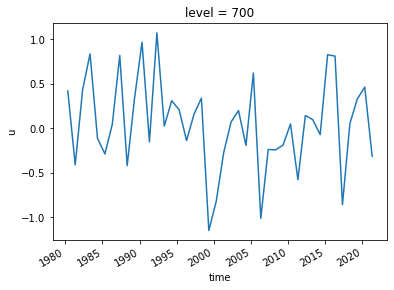

In [21]:
wgts2 = np.cos(np.deg2rad(u700_idx2_anom[lat_name]))
u700_ts2 = u700_idx2_anom.weighted(wgts2).mean((lon_name, lat_name))
u700_ts2.plot()

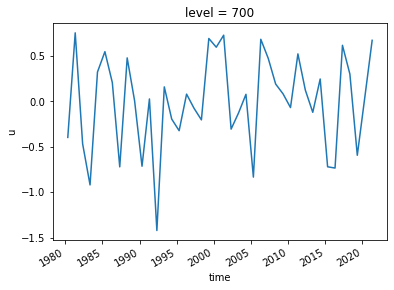

In [22]:
u700_idx = u700_ts1 - u700_ts2
u700_idx.plot()

In [23]:
u700_idx

<xarray.DataArray 'u' (time: 42)>
array([-0.39641163,  0.75547076, -0.46722727, -0.91975385,  0.32414817,
        0.54817667,  0.20737282, -0.72094559,  0.47941369,  0.00676883,
       -0.71392423,  0.02722712, -1.42193271,  0.160112  , -0.1943302 ,
       -0.32251034,  0.08026388, -0.07477795, -0.20320881,  0.69318617,
        0.59726676,  0.72965349, -0.30507645, -0.12740017,  0.07821733,
       -0.8337144 ,  0.6844607 ,  0.47508176,  0.19159772,  0.08302449,
       -0.06760263,  0.523441  ,  0.12438889, -0.12003393,  0.24705416,
       -0.71998914, -0.73404721,  0.61810635,  0.3013771 , -0.59344627,
        0.03900452,  0.67296706])
Coordinates:
  * time     (time) datetime64[ns] 1980-04-30 1981-04-30 ... 2021-04-30
    level    int32 700